# Extracting and Visualizing Stock Data
Description
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

# Table of Contents

Define a Function that Makes a Graph
Question 1: Use yfinance to Extract Stock Data
Question 2: Use Webscraping to Extract Tesla Revenue Data
Question 3: Use yfinance to Extract Stock Data
Question 4: Use Webscraping to Extract GME Revenue Data
Question 5: Plot Tesla Stock Graph
Question 6: Plot GameStop Stock Graph
Estimated Time Needed: 30 min

In [1]:
!pip install yfinance==0.1.67
!pip install beautifulsoup4
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
#!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.37
    Uninstalling yfinance-0.2.37:
      Successfully uninstalled yfinance-0.2.37


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define Graphing Function
In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [4]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [9]:
!pip install yfinance

In [11]:
from yfinance import Ticker

if isinstance(tesla, Ticker):
    print("`tesla` is a yfinance.Ticker object")
else:
    print("`tesla` is not a yfinance.Ticker object")

`tesla` is a yfinance.Ticker object


In [1]:
!pip show yfinance
!pip install --upgrade yfinance
!pip show pandas
!pip install --upgrade pandas
import pandas as pd

print(pd.__version__)



Name: yfinance
Version: 0.2.37
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: appdirs, beautifulsoup4, frozendict, html5lib, lxml, multitasking, numpy, pandas, peewee, pytz, requests
Required-by: 
Name: pandas
Version: 2.2.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following cond

In [2]:
from yfinance import Ticker
tesla = Ticker("TSLA")
tesla_data = pd.DataFrame(tesla.history(period = "max"))
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-28 00:00:00-04:00,177.449997,179.570007,175.300003,175.789993,77654800,0.0,0.0
2024-04-01 00:00:00-04:00,176.169998,176.750000,170.210007,175.220001,81562100,0.0,0.0
2024-04-02 00:00:00-04:00,164.750000,167.690002,163.429993,166.630005,116650600,0.0,0.0


# Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [4]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data
Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [6]:
!pip install requests
import requests
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Parse the html data using beautiful_soup.


In [8]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')


# Using BeautifulSoup or the read_html function extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

Click here if you need help locating the table
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]

If you want to use the read_html function the table is located at index 1



In [12]:
for index, table in enumerate(html_tables):
    if "Tesla Quarterly Revenue" in str(table):
        html_table = table
        tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

        for row in html_table.tbody.find_all("tr"):
            col = row.find_all("td")
            if col != []:
                date = str(col[0].string)
                revenue = str(col[1].string)
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

# Execute the following line to remove the comma and dollar sign from the Revenue column.



In [13]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [14]:
# Execute the following lines to remove an null or empty strings in the Revenue column.



In [15]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != "None"]

# Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.



In [18]:
tesla_revenue.tail(5)


,Date,Revenue


# Question 3: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [21]:
!pip install yfinance
import yfinance as yf
gmstp = yf.Ticker("GME")
print(gmstp)



yfinance.Ticker object <GME>


Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [22]:
gme_data = gmstp.history(period = "max")
gme_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-28 00:00:00-04:00,13.190000,13.190000,12.470000,12.520000,8473500,0.0,0.0
2024-04-01 00:00:00-04:00,12.630000,12.670000,11.550000,11.990000,9207100,0.0,0.0
2024-04-02 00:00:00-04:00,11.840000,11.990000,11.260000,11.280000,6327700,0.0,0.0


Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [23]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data.

In [24]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

# Parse the html data using beautiful_soup.

In [25]:
soup = BeautifulSoup(html_data, "html5lib")


In [26]:
# # Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


Click here if you need help locating the table
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

In [32]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if col != []:
        date = str(col[0].string)
        revenue = str(col[1].string)
        gme_revenue.loc[len(gme_revenue)] = {"Date": date, "Revenue": revenue}

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "")

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != "None"]
gme_revenue

,Date,Revenue
0,2020-04-30,$1021
1,2020-01-31,$2194
2,2019-10-31,$1439
3,2019-07-31,$1286
4,2019-04-30,$1548
...,...,...
57,2006-01-31,$1667
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


Display the last five rows of the gme_revenue dataframe using the tail function. Take a screenshot of the results.



In [33]:
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,$1667
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


Question 5: Plot Tesla Stock Graph


Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(tesla_data, tesla_revenue, 'Tesla'). Note the graph will only show data upto June 2021.

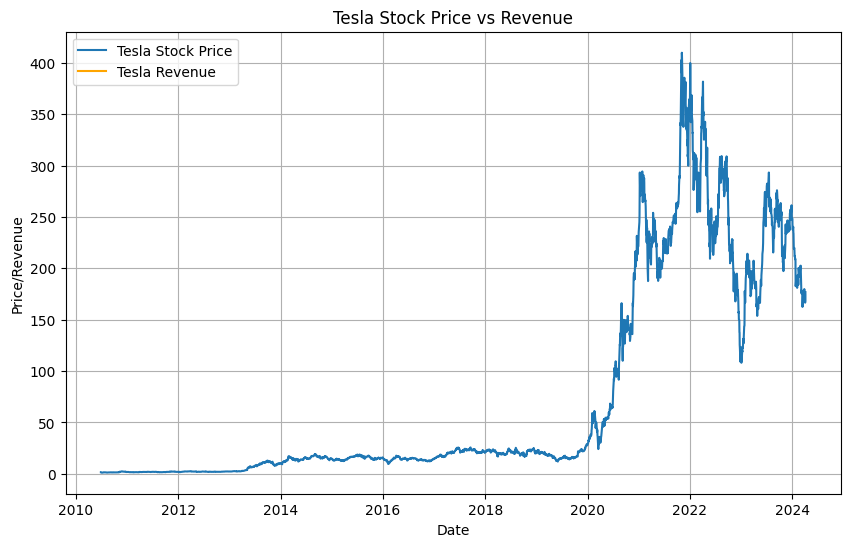

In [44]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10, 6))

    # Plotting stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock_name} Stock Price')

    # Plotting revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label=f'{stock_name} Revenue', color='orange')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Price/Revenue')
    plt.title(f'{stock_name} Stock Price vs Revenue')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

# Example usage:
make_graph(tesla_data, tesla_revenue, 'Tesla')


# Question 6: Plot GameStop Stock Graph


Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). Note the graph will only show data upto June 2021.

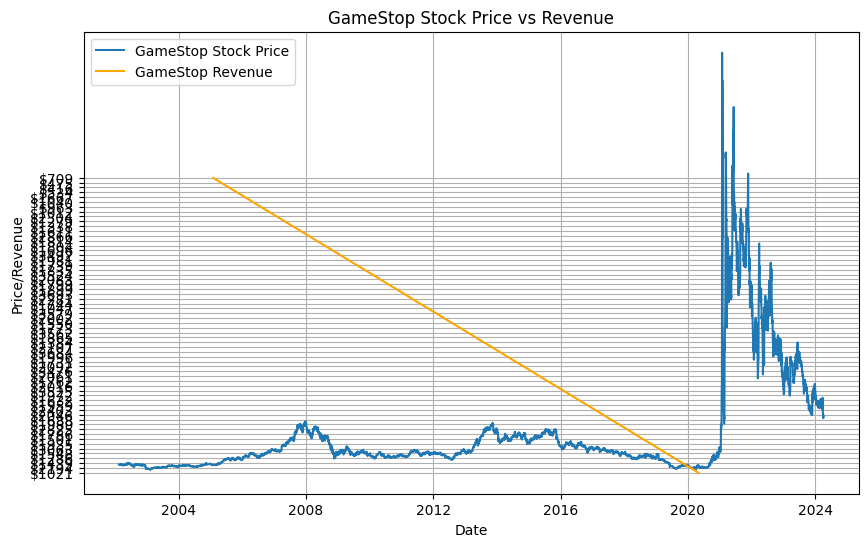

In [49]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10, 6))

    # Convert date column to datetime if it's not already in datetime format
    if not isinstance(stock_data['Date'], pd.DatetimeIndex):
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    if not isinstance(revenue_data['Date'], pd.DatetimeIndex):
        revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Plotting stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock_name} Stock Price')

    # Plotting revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label=f'{stock_name} Revenue', color='orange')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Price/Revenue')
    plt.title(f'{stock_name} Stock Price vs Revenue')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

# Example usage:
make_graph(gme_data, gme_revenue, 'GameStop')
